# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Soldier Race Project (Supervised Project)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about our latest updates, please don't forget to follow us! </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# About Dataset

**ANSUR II Databases: Ethnicity Prediction**

**1. Overview:**  
- ANSUR II (Anthropometric Survey of U.S. Army Personnel) is based on the results of a large-scale anthropometric (body measurements) study conducted by the U.S. Army in 2012.

**2. Dataset Content:**

- ANSUR II includes body measurements and ethnicity data for military personnel. The dataset contains over 100 measurements from various body parts of individuals. These measurements include details of the head, hand, foot, leg, arm, chest, and more.

- The dataset contains 93 directly measured anthropometric variables and 15 demographic/administrative variables described below.

- The male dataset includes a sample of 4,082 subjects.

- The ANSUR II female dataset contains a sample of 1,986 subjects.

- In addition to anthropometric and demographic data, the ANSUR II database also includes 3D full-body, foot, and head scans of the participants. However, these 3D data are not publicly available to respect the privacy of ANSUR II participants.

**3. Who Participated?**
- This database includes representatives from various ethnic groups and age groups of active-duty military personnel. The dataset contains measurements from both male and female participants.

**4. Relationship Between Measurement and Ethnicity:**
- Different ethnic groups may have distinct body structures due to genetic and environmental factors. This can be observed through variations in measurements such as leg length, head shape, hand, and foot dimensions.

**5. Modeling and Prediction:**
- Ethnicity prediction can be approached as a classification problem using the body measurements in the ANSUR II dataset.
- The algorithm to be used will learn the relationship between measurements and ethnicity and can be applied to new data to make ethnicity predictions.

**6. Importance and Application Areas of the Project:**
- Such research is used to analyze body measurements of military personnel to inform the design and production of military equipment, clothing, and other systems. Accurate measurements are crucial for the comfort, mobility, and overall safety of military personnel.

- Additionally, this has many potential commercial, industrial, and academic applications.

- Furthermore, for example, with laser readers and sensors, it might be possible to detect ethnicity upon entry at an airport.

DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

# Tasks

**Exploratory Data Analysis (EDA)**

- Import Libraries

- Load the Dataset

- Explore the Data

**Data Preprocessing**

- Scaling (if necessary)

- Split the dataframe for evaluation purposes

**Classification Algorithms**

- Apply Logistic Regression

- Apply SVM Classifier

- Apply Decision Tree Classifier

- Apply Random Forest Classifier

- Apply XGBoost Classifier

- Compare the Models

SMOTE

SHAP

# EDA

**Retrieve data from the following links and create a data frame**

- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [2]:
import numpy as np
import pandas as pd

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import pickle


In [2]:
# Let's import data for male and female soldiers
df_m = pd.read_csv("ansur_male.csv", encoding='ISO-8859-1')
df_f = pd.read_csv("ansur_female.csv", encoding='ISO-8859-1')

In [3]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [4]:
df_f.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [5]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [6]:
df_f.info(),df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None)

In [7]:
# Both dataframes have same number of columns. Let's concat them.
df = pd.concat([df_m,df_f])

In [8]:
df.shape

(6068, 109)

In [9]:
# The number of columns increased by one because one dataset has SubjectId, another one has it as subjectid.
df_f = df_f.rename(columns = {"SubjectId":"subjectid"})

In [10]:
# Let's concat them again
df = pd.concat([df_m,df_f])
df.shape

(6068, 108)

In [11]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [13]:
df.isnull().sum().any()

True

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()[df.isnull().sum()>0]

Ethnicity    4647
dtype: int64

In [57]:
# Let's create a copy of df before making adjustments
# df_raw = df.copy()
# df_raw.to_csv('df_raw_for_new_data.csv', index=None)

In [16]:
# As per assignment instructions let's drop some columns that will be not needed or cause multicollinearity
df = df.drop(columns=['subjectid','Ethnicity','SubjectNumericRace','Heightin','Weightlbs','WritingPreference'])

DODRace – Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option.

This variable is intended to be comparable to the Defense Manpower Data Center demographic data. 

Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,

5 = Native American, 6 = Pacific Islander, 8 = Other

In [17]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [18]:
df.DODRace.dtype

dtype('int64')

In [19]:
# We will keep only the first three races as per assignment terms by dropping values with less that 500 counts
df = df[df.DODRace<=3]

In [20]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [21]:
df.shape

(5769, 102)

In [22]:
df.isnull().sum().any()

False

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64


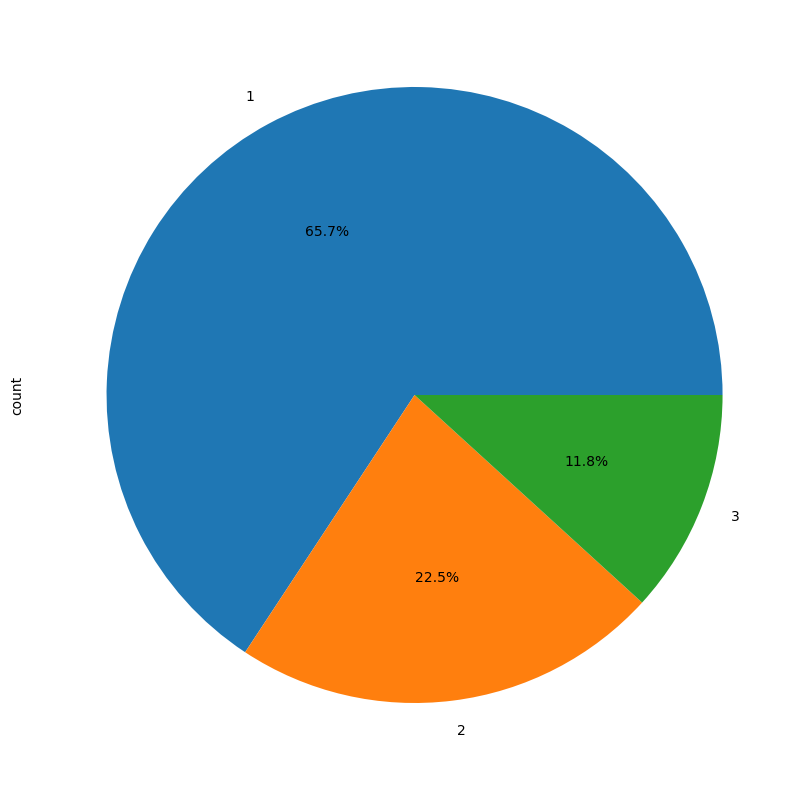

In [23]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

The dataset is highly imbalanced in favor of White race, while Hispanic race having the least share

In [24]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,...,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41
1,233,1395,326,220,1293,245,193,394,338,257,...,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,35
2,287,1430,341,230,1327,256,196,427,408,261,...,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,42
3,234,1347,310,230,1239,262,199,401,359,262,...,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31
4,250,1585,372,247,1478,267,224,435,356,263,...,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,21


In [25]:
# to find how many unique values object features have
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value


Controlling for non-numeric features are important, because it will cause our data to grow bigger when we apply the get dummies operation and will not yield any meaningful results. Therefore, it is better to drop unmeaningfull categorical featurs.

* Date column: This is unlikely to have any direct correlation with the soldier’s race. It might be more relevant for time-series analysis or equipment performance, but not for predicting race.
* Component: Component could have some indirect relation to race, depending on demographic distributions within different military branches. However, it’s unlikely to be a primary predictor and may introduce bias.
* PrimaryMOS: While some job classifications may have racial disparities, this is unlikely to be a strong predictor of race. Including it may introduce bias if certain MOS roles are predominantly held by particular racial groups.
* Installation: While location might have some demographic correlation (i.e., different bases could have different racial compositions), it is more likely that this column will add noise rather than provide useful predictive power for the model.

In [26]:
df = df.drop(columns=["Date", "Installation", "Component","PrimaryMOS"])

In [27]:
df.shape

(5769, 98)

In [28]:
# Let's examine numeric columns
df.select_dtypes(include='number').corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,...,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,-0.031860,0.385555
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,...,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,-0.217393,0.082966
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,...,0.373562,0.354902,0.327976,0.480876,0.845864,0.595740,0.642518,0.677140,-0.158561,0.081739
anklecircumference,0.518896,0.504673,0.416051,1.000000,0.461200,0.709550,0.561528,0.536816,0.637641,0.450363,...,0.585273,0.564041,0.510282,0.482198,0.408262,0.741326,0.697485,0.508567,-0.157784,-0.026483
axillaheight,0.280824,0.987115,0.857391,0.461200,1.000000,0.657023,0.785011,0.705028,0.457740,0.361619,...,0.362550,0.328417,0.290065,0.567598,0.946468,0.613565,0.685336,0.903063,-0.205576,0.044501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weightkg,0.825198,0.677768,0.595740,0.741326,0.613565,0.730920,0.645382,0.703679,0.875365,0.580564,...,0.858881,0.872855,0.830974,0.679795,0.519696,1.000000,0.798308,0.665846,-0.096400,0.233398
wristcircumference,0.546947,0.733564,0.642518,0.697485,0.685336,0.827143,0.743230,0.803051,0.760451,0.348062,...,0.578244,0.576793,0.553025,0.617985,0.632789,0.798308,1.000000,0.663459,-0.174408,0.150658
wristheight,0.383157,0.921268,0.677140,0.508567,0.903063,0.629620,0.683307,0.621811,0.501066,0.460298,...,0.479839,0.440938,0.388914,0.617996,0.812746,0.665846,0.663459,1.000000,-0.267874,0.110000
DODRace,-0.031860,-0.217393,-0.158561,-0.157784,-0.205576,-0.111249,-0.059867,-0.113701,-0.031438,-0.203874,...,-0.125099,-0.071195,-0.031391,-0.160391,-0.174910,-0.096400,-0.174408,-0.267874,1.000000,0.013222


In [45]:
# Calculate the correlation matrix for numeric columns
df_temp = df.select_dtypes('number').corr()

# Initialize count and lists for features and collinear pairs
count = 0
feature = []
collinear = []

# Loop through the correlation matrix and identify strong correlations
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > 0.9 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.9 and df_temp[col][i] > -1):
            # Ensure we only count each pair once
            if i != col and i not in feature:
                feature.append(col)
                collinear.append(i)
                count += 1  # Increment the count
                print(f"Multicollinearity alert between {col} and {i}")

# Output the number of strong correlated features
print("Number of strong correlated features:", count)


Multicollinearity alert between abdominalextensiondepthsitting and waistcircumference
Multicollinearity alert between abdominalextensiondepthsitting and waistdepth
Multicollinearity alert between acromialheight and axillaheight
Multicollinearity alert between acromialheight and cervicaleheight
Multicollinearity alert between acromialheight and chestheight
Multicollinearity alert between acromialheight and iliocristaleheight
Multicollinearity alert between acromialheight and kneeheightsitting
Multicollinearity alert between acromialheight and stature
Multicollinearity alert between acromialheight and suprasternaleheight
Multicollinearity alert between acromialheight and tenthribheight
Multicollinearity alert between acromialheight and waistheightomphalion
Multicollinearity alert between acromialheight and wristheight
Multicollinearity alert between acromionradialelength and shoulderelbowlength
Multicollinearity alert between acromionradialelength and sleeveoutseam
Multicollinearity aler

It looks like we have identified 143 pairs of highly correlated features in the ANSUR II dataset with multicollinearity alerts. These strong correlations (with correlation coefficients greater than 0.9 or less than -0.9) indicate that these pairs of features are highly similar in terms of the information they provide. This can cause issues such as:

* Redundancy in Data: When two features are highly correlated, they essentially provide the same information, leading to redundancy.
* Multicollinearity: This can negatively impact the performance of models like linear regression, logistic regression, or any other models that rely on independent features. It can also affect the interpretability of models.

To address this issue we will use Principal Component Analysis


In [30]:
# df.to_csv('df.csv',index=None)
# df= pd.read_csv('df.csv')

In [46]:
# Separate features and target variable
X = df.drop('DODRace', axis=1)
y = df['DODRace']


In [47]:
X.shape

(5769, 97)

In [48]:
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'han

In [49]:
#Let's apply label encoding to Gender feature as it has only two categories
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender']) 

In [50]:
# One-Hot Encoding for Categorical Columns with More Than Two Categories
# One-Hot Encoding, dropping one category to avoid multicollinearity
X = pd.get_dummies(X, columns=['Branch', 'SubjectsBirthLocation'], drop_first=True)  

In [51]:
# Save the column names generated by `pd.get_dummies()`
columns_after_encoding = X.columns

In [52]:
X.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'SubjectsBirthLocation_United States', 'SubjectsBirthLocation_Utah',
       'SubjectsBirthLocation_Venezuela', 'SubjectsBirthLocation_Vermont',
       'SubjectsBirthLocation_Virginia', 'SubjectsBirthLocation_Washington',
       'SubjectsBirthLocation_West Virginia',
       'SubjectsBirthLocation_Wisconsin', 'SubjectsBirthLocation_Wyoming',
       'SubjectsBirthLocation_Zambia'],
      dtype='object', length=232)

In [53]:
X.shape

(5769, 232)

In [54]:
# Now we can standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

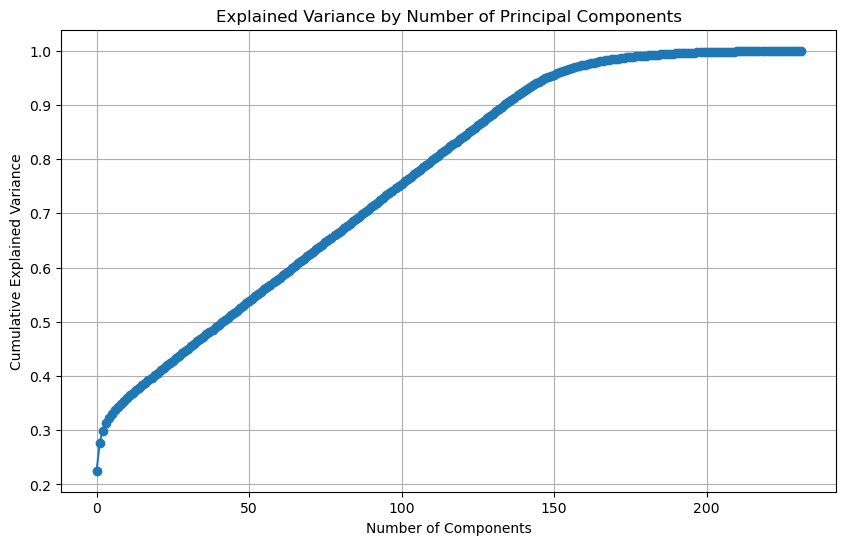

In [55]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

Re-apply PCA with Selected Number of Components

We  decide to keep enough components to explain 95% of the variance.

In [56]:
# Decide on the number of components
variance_threshold = 0.90
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f'Number of components to explain {variance_threshold*100}% variance: {n_components}')

# Re-apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


Number of components to explain 90.0% variance: 135


In [57]:
# Get the loading scores
loading_scores = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)

# Display the loadings
loading_scores


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135
abdominalextensiondepthsitting,-0.080483,-0.190900,0.033695,0.051371,-0.166302,-0.019725,-0.036060,0.012795,0.026424,-0.049704,...,0.006352,-0.000947,-0.023523,0.000502,-0.001199,-0.010670,0.041255,0.028378,-0.017342,-0.024141
acromialheight,-0.126427,0.081542,0.059752,-0.109046,-0.028668,0.015092,-0.038003,0.019219,-0.003326,0.028541,...,0.000428,0.000202,0.003422,-0.000432,0.001060,0.004837,-0.000821,0.008943,0.004659,-0.022937
acromionradialelength,-0.114363,0.089783,0.075944,0.013019,-0.070369,-0.023831,-0.002824,-0.053801,-0.016324,-0.092791,...,-0.001730,0.007830,0.012125,-0.020430,0.027071,-0.010218,-0.011535,0.013592,-0.028775,-0.006272
anklecircumference,-0.092739,-0.096971,0.000278,-0.030705,0.249143,-0.032934,0.136790,0.153282,-0.081267,-0.079629,...,0.001918,0.009187,0.006551,-0.010311,-0.012598,0.000802,-0.053546,-0.021270,-0.030284,0.044642
axillaheight,-0.121753,0.104207,0.076670,-0.102708,-0.014194,0.017003,-0.033256,0.015332,0.001733,0.026727,...,-0.001053,0.003271,0.001410,0.001320,-0.004070,0.003859,0.000599,0.008552,0.010375,-0.026105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectsBirthLocation_Washington,0.001465,-0.001510,-0.001533,-0.035314,0.019877,-0.009907,0.024779,0.019362,-0.020893,0.024121,...,-0.034132,0.034205,-0.052190,0.047276,-0.005000,0.073120,-0.067516,0.046109,-0.089179,-0.017930
SubjectsBirthLocation_West Virginia,0.002421,0.004206,-0.000368,-0.025004,-0.005168,0.003942,0.021290,-0.004835,0.018257,0.003752,...,-0.041841,0.119281,-0.089384,-0.039120,-0.056475,0.091995,0.041394,-0.008647,0.009538,-0.004761
SubjectsBirthLocation_Wisconsin,0.000762,0.003576,0.026383,-0.033325,0.016194,-0.028231,-0.005194,0.004182,-0.039374,0.016285,...,0.018718,-0.065089,0.024081,-0.032613,0.003053,0.014758,-0.004452,-0.078236,-0.084039,0.025470
SubjectsBirthLocation_Wyoming,0.001501,-0.003086,-0.002084,-0.002435,0.002301,-0.024946,-0.005083,-0.029508,0.000305,-0.002953,...,0.042525,0.016982,-0.094490,0.011315,0.002837,0.107158,-0.124899,0.012961,-0.000150,-0.106306


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [59]:
X_train.shape, X_test.shape

((4615, 135), (1154, 135))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Logistic model

Vanilla Model Training Accuracy: 0.9066088840736728
Vanilla Model Test Accuracy: 0.8864818024263431
Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.88      0.96      0.92       733
           2       0.92      0.88      0.90       282
           3       0.83      0.50      0.63       139

    accuracy                           0.89      1154
   macro avg       0.88      0.78      0.81      1154
weighted avg       0.88      0.89      0.88      1154



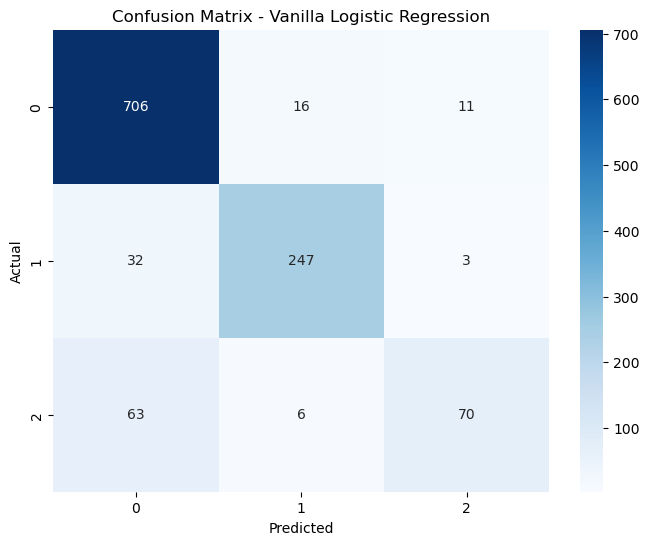

In [99]:
# Instantiate the logistic regression vanilla model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the accuracy on both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Vanilla Model Training Accuracy: {train_accuracy}")
print(f"Vanilla Model Test Accuracy: {test_accuracy}")

# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix on test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Vanilla Logistic Regression')
plt.show()


Check for Overfitting/Underfitting:

* If the training accuracy is significantly higher than the test accuracy, the model might be overfitting.
* If both accuracies are low, the model could be underfitting.

Based on our vanilla model resutls, accuracy levels are good, but test accruacy is a bit lower than the train accuracy level. Let's apply Hyperparameter Tuning with GridSearchCV

To focus our GridSearchCV on maximizing the recall for the Hispanic class (value 3), we need to modify the scoring metric used in the grid search. Specifically, we should adjust the scoring function to focus on the recall of the class we're interested in (Class 3).

In [100]:
from sklearn.metrics import recall_score, make_scorer

# Create a custom scorer to maximize recall for Class 3 (Hispanic)
def class_3_recall(y_true, y_pred):
    # Filter y_true and y_pred for only Class 3 instances
    y_true_class_3 = (y_true == 3)
    y_pred_class_3 = (y_pred == 3)
    
    # Calculate recall for Class 3
    return recall_score(y_true_class_3, y_pred_class_3)

# Create a scorer object using make_scorer
hispanic_recall_scorer = make_scorer(class_3_recall)



In [101]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001,0.01],
    'penalty': ['l1', 'l2'],  # Regularization
    'solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2
    'max_iter': [2000]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42), 
    param_grid, 
    cv=5, verbose=1, 
    n_jobs=-1,
    scoring=hispanic_recall_scorer)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters from GridSearchCV: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}


In [102]:
# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Fit the model to the training data (already done by GridSearchCV, but we can ensure it's applied here)
best_logreg.fit(X_train, y_train)


LogisticRegression(C=0.01, max_iter=2000, random_state=42, solver='saga')

In [105]:
# Predict on the training set
y_train_pred_best = best_logreg.predict(X_train)

# Predict on the test set
y_test_pred_best = best_logreg.predict(X_test)

# Evaluate the accuracy on both sets
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy after tuning: {train_accuracy_best}")
print(f"Test Accuracy after tuning: {test_accuracy_best}")

# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_best))


Training Accuracy after tuning: 0.8897074756229686
Test Accuracy after tuning: 0.8708838821490468
Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       733
           2       0.91      0.85      0.88       282
           3       0.83      0.43      0.57       139

    accuracy                           0.87      1154
   macro avg       0.87      0.75      0.79      1154
weighted avg       0.87      0.87      0.86      1154



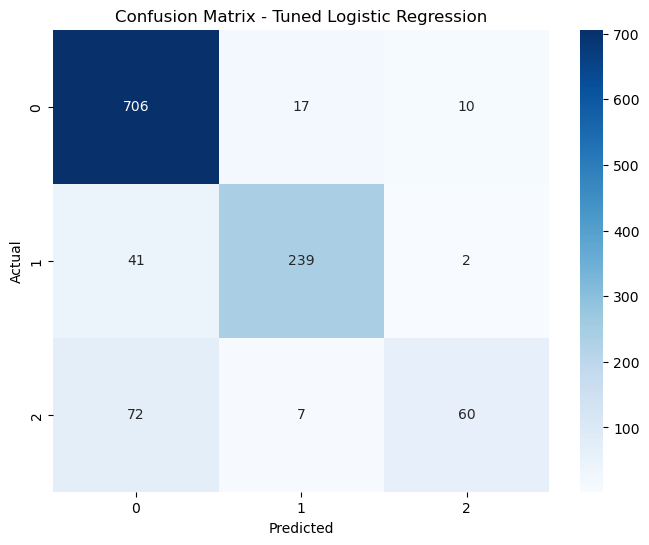

In [106]:
# Confusion matrix on test set
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()


Class Imbalance: It seems Class 1 is significantly more frequent than Class 3 (733 vs. 139 instances). This could be affecting the model's ability to predict Class 3 accurately.

* Possible Solution: We can try techniques like oversampling (e.g., SMOTE) or undersampling to balance the dataset.
* Class Weights: Another option is to use the class_weight='balanced' parameter in logistic regression to give more weight to the less frequent classes.

Recall for Class 3: The recall for Class 3 is quite low, meaning that many instances of Class 3 are being misclassified.

* Possible Solution: Adjusting the regularization (C) or trying other models like Random Forests or XGBoost, which might perform better with imbalanced datasets, could help.

In [107]:
# We will use the class_weight='balanced' parameter in logistic regression to give more weight to the less frequent classes.
best_logreg = LogisticRegression(
    C=0.01, penalty='l2', 
    solver='saga', 
    max_iter=2000, 
    class_weight='balanced')

# Fit the model to the training data
best_logreg.fit(X_train, y_train)


LogisticRegression(C=0.01, class_weight='balanced', max_iter=2000,
                   solver='saga')

In [108]:
# Predict on the training set
y_train_pred_best = best_logreg.predict(X_train)

# Predict on the test set
y_test_pred_best = best_logreg.predict(X_test)

# Evaluate the accuracy on both sets
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy after tuning: {train_accuracy_best}")
print(f"Test Accuracy after tuning: {test_accuracy_best}")

Training Accuracy after tuning: 0.8335861321776815
Test Accuracy after tuning: 0.8180242634315424


In [110]:
# Classification report on test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_best))

Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       733
           2       0.85      0.89      0.87       282
           3       0.46      0.75      0.57       139

    accuracy                           0.82      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.85      0.82      0.83      1154



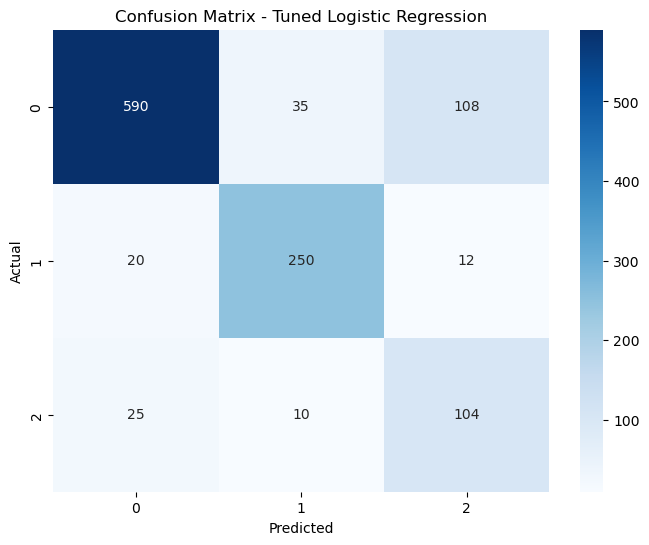

In [111]:
# Confusion matrix on test set
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()

The result of applying class_weight='balanced':
* Class 1:
The recall for Class 1 dropped (from 0.97 to 0.81), which is expected because the class balancing is making the model prioritize the less frequent classes. However, the precision for Class 1 has improved (0.86 to 0.93), indicating that fewer false positives are being made for this class.
* Class 2:
Class 2 has maintained high performance with only slight changes, which indicates that the model is handling this class well both before and after class weighting.
* Class 3:
Class 3 saw the most significant improvement. The recall increased dramatically from 0.43 to 0.76, meaning the model is now much better at identifying instances of Class 3. However, the precision dropped to 0.47, indicating that while it’s finding more instances of Class 3, it's also making more false positives (misclassifying other classes as Class 3).
<p><b>Overall Impact:</p></b>
Accuracy: The overall accuracy dropped slightly to 83% (from 88%), but this is expected due to class balancing. The model is now focusing more on the minority class (Class 3) rather than prioritizing the majority class (Class 1).

Macro Average: The macro avg recall improved from 0.75 to 0.83, indicating that the model is now better balanced across all classes.

Weighted Average: The weighted avg values are still strong, reflecting that the model performs well across all classes, even though Class 3 is more challenging.

<b>Let's use SMOTE for oversampling Class 3 to see if it improves the model</b>

In [90]:
# !pip install imbalanced-learn --quiet

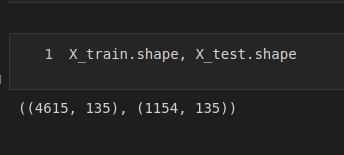

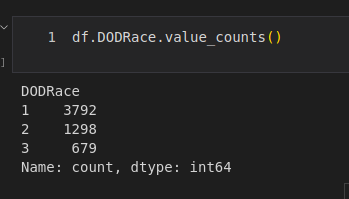

In [112]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)

# Generate new balanced training data using SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")


Class distribution after SMOTE: Counter({3: 3059, 1: 3059, 2: 3059})


In [113]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01],               # Regularization strength
    'penalty': ['l1', 'l2'],           # L1 and L2 regularization
    'solver': ['liblinear', 'saga'],   # Solvers that support L1 and L2 regularization
    'max_iter': [2000]                 # Maximum number of iterations
}

# Setup GridSearchCV with the custom scorer
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),  # Logistic Regression model
    param_grid=param_grid,                          # Hyperparameter grid
    cv=5,                                           # 5-fold cross-validation
    verbose=1,                                      # Verbose output to track progress
    n_jobs=-1,                                      # Use all available cores for parallel processing
    scoring=hispanic_recall_scorer                  # Use the custom recall scorer for Class 3
)

# Fit GridSearchCV on the SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters from GridSearchCV: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [114]:
# Get the best model
best_logreg = grid_search.best_estimator_

Training Accuracy after SMOTE: 0.7843986998916577
Test Accuracy after SMOTE: 0.7868284228769498
Classification Report on Test Set (After SMOTE):
              precision    recall  f1-score   support

           1       0.95      0.74      0.83       733
           2       0.75      0.92      0.82       282
           3       0.45      0.77      0.57       139

    accuracy                           0.79      1154
   macro avg       0.72      0.81      0.74      1154
weighted avg       0.84      0.79      0.80      1154



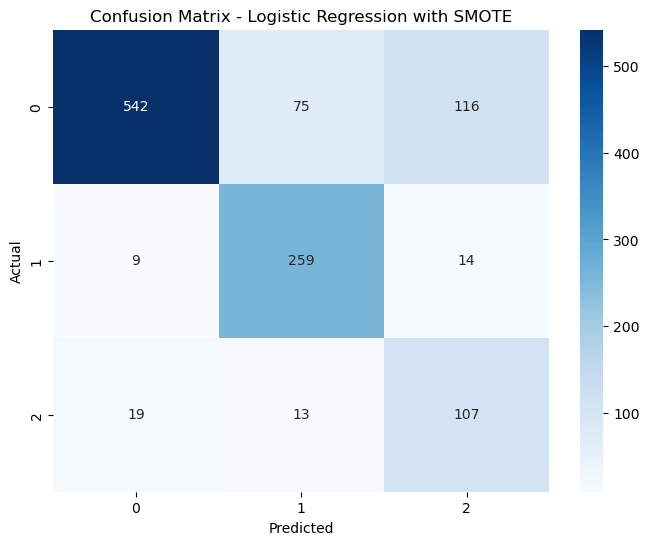

In [115]:
# Predict on the training set
y_train_pred_smote = best_logreg.predict(X_train)
# Predict on the test set
y_test_pred_smote = best_logreg.predict(X_test)

# Evaluate the accuracy on both sets
train_accuracy_smote = accuracy_score(y_train, y_train_pred_smote)
test_accuracy_smote = accuracy_score(y_test, y_test_pred_smote)

print(f"Training Accuracy after SMOTE: {train_accuracy_smote}")
print(f"Test Accuracy after SMOTE: {test_accuracy_smote}")

# Classification report on test set
best_log_report = classification_report(y_test, y_test_pred_smote, output_dict=True)
print("Classification Report on Test Set (After SMOTE):")
print(classification_report(y_test, y_test_pred_smote))

# Confusion matrix after SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_test_pred_smote)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE')
plt.show()


## Analysis of Logistic Regression Performance Before and After SMOTE

### **Before SMOTE**
- **Training Accuracy**: 83.36%
- **Test Accuracy**: 81.80%

#### Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 1     | 0.93      | 0.80   | 0.86     | 733     |
| 2     | 0.85      | 0.89   | 0.87     | 282     |
| 3     | 0.46      | 0.75   | 0.57     | 139     |

#### Observations (Before SMOTE):
- **Class 1 (Majority Class)**:
  - **Precision** was high at 0.93, indicating good performance in predicting Class 1 instances correctly.
  - **Recall** was 0.80, showing that the model missed some Class 1 instances (20% misclassified).
  
- **Class 2**:
  - The performance was balanced for Class 2, with precision at 0.85 and recall at 0.89.
  
- **Class 3 (Hispanic Class)**:
  - **Precision** for Class 3 was relatively low at 0.46, meaning that many false positives were being classified as Class 3.
  - **Recall** was 0.75, indicating that the model successfully identified 75% of Class 3 instances.
  - The **F1-score** for Class 3 was 0.57, showing that there is room for improvement, especially in reducing false positives.

---

### **After SMOTE**
- **Training Accuracy**: 78.44%
- **Test Accuracy**: 78.68%

#### Classification Report (After SMOTE):

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 1     | 0.95      | 0.74   | 0.83     | 733     |
| 2     | 0.75      | 0.92   | 0.82     | 282     |
| 3     | 0.45      | 0.77   | 0.57     | 139     |

#### Observations (After SMOTE):
- **Class 1 (Majority Class)**:
  - Precision increased slightly to 0.95, but **recall has dropped** to 0.74 from 0.80. The model missed more Class 1 instances after SMOTE.
  
- **Class 2**:
  - The recall for Class 2 improved significantly from 0.89 to 0.92, though precision dropped slightly to 0.75.
  
- **Class 3 (Hispanic Class)**:
  - **Recall for Class 3** increased slightly from 0.75 to 0.77, meaning the model became better at identifying actual Class 3 instances.
  - **Precision** for Class 3 remained low at 0.45, showing the model is still misclassifying other classes as Class 3 at a high rate.
  - The **F1-score** for Class 3 remained stable at 0.57, indicating a balance between precision and recall but with room for further improvement.

---

### **Key Takeaways**
1. **Accuracy**: 
   - Overall **test accuracy decreased** after SMOTE from 81.80% to 78.68%. This is expected as SMOTE focuses on improving minority class performance, often at the cost of overall accuracy.
   
2. **Class 1**:
   - **Recall for Class 1 decreased** after SMOTE (from 0.80 to 0.74), meaning the model identified fewer Class 1 instances correctly. This suggests that the model shifted attention toward the minority classes.

3. **Class 2**:
   - **Recall for Class 2 improved** after SMOTE, from 0.89 to 0.92, though the precision dropped slightly.

4. **Class 3 (Hispanic Class)**:
   - The primary goal was to improve **recall for Class 3** (Hispanic), which **increased slightly** after SMOTE (from 0.75 to 0.77).
   - However, **precision for Class 3** did not improve, remaining at 0.45, meaning that false positives for Class 3 are still an issue.
   
---

### **Conclusion**
- **SMOTE** improved **recall for the Hispanic class (Class 3)** but caused a slight decrease in overall accuracy and **recall for Class 1**.
- **Precision for Class 3 remained low**, indicating that while the model identified more Hispanic instances, it also misclassified other classes as Hispanic.

---

### **Next Steps**
1. **Threshold Tuning**: Adjust decision thresholds to find a better balance between precision and recall for Class 3.
2. **Class Weights**: Use class weighting in logistic regression to further prioritize Class 3 without negatively impacting other classes.


---


## SVC

Test Accuracy SVM: 0.8258232235701907
SVM - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       733
           2       0.90      0.88      0.89       282
           3       0.46      0.72      0.56       139

    accuracy                           0.83      1154
   macro avg       0.76      0.81      0.77      1154
weighted avg       0.86      0.83      0.84      1154



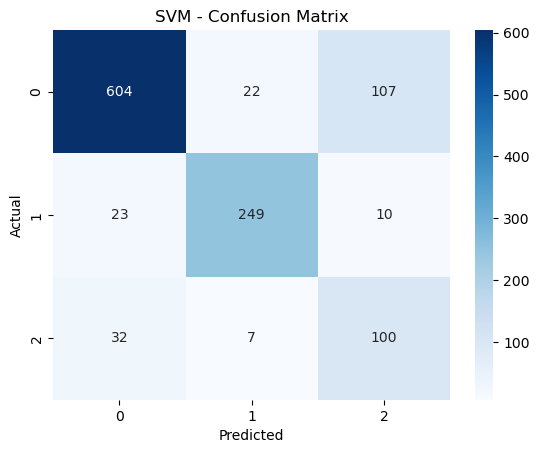

In [116]:
# Instantiate and train the SVM classifier on the SMOTE-balanced data
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Test Accuracy SVM: {test_accuracy_svm}")

# Evaluate the SVM model
print("SVM - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_svm))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the Support Vector Machine (SVM) model

In [122]:
# Define the hyperparameter grid for tuning SVM
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto'],            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]                    # Degree of the polynomial kernel (only applicable for 'poly')
}


In [123]:
# Initialize the Support Vector Classifier
svm = SVC(random_state=42)

# Set up GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    cv=5, verbose=2, 
    n_jobs=-1,
    scoring=hispanic_recall_scorer)

# Fit GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  28.0s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  30.1s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  29.9s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  31.8s
[CV] END ......C=0.001, degree=2, gamma=scale, kernel=linear; total time=  34.6s
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time= 1.2min
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time= 1.2min
[CV] END .........C=0.001, degree=2, gamma=scale, kernel=rbf; total time= 1.2min
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  54.7s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  54.5s
[CV] END ........C=0.001, degree=2, gamma=scale, kernel=poly; total time=  53.2s
[CV] END .......C=0.001, degree=2, gamma=auto, kernel=linear; total time=  18.1s
[CV] END .........C=0.001, d

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(class_3_recall), verbose=2)

In [146]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_svm.best_params_}")

# Best model based on the grid search
best_svm = grid_search_svm.best_estimator_

Best Hyperparameters from GridSearchCV: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


SVM Train Accuracy after tuning: 0.9963163596966413
SVM Test Accuracy after tuning: 0.8310225303292894
Classification Report on Test Set (Tuned SVM):
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       733
           2       0.89      0.80      0.84       282
           3       0.55      0.54      0.54       139

    accuracy                           0.83      1154
   macro avg       0.77      0.75      0.76      1154
weighted avg       0.83      0.83      0.83      1154



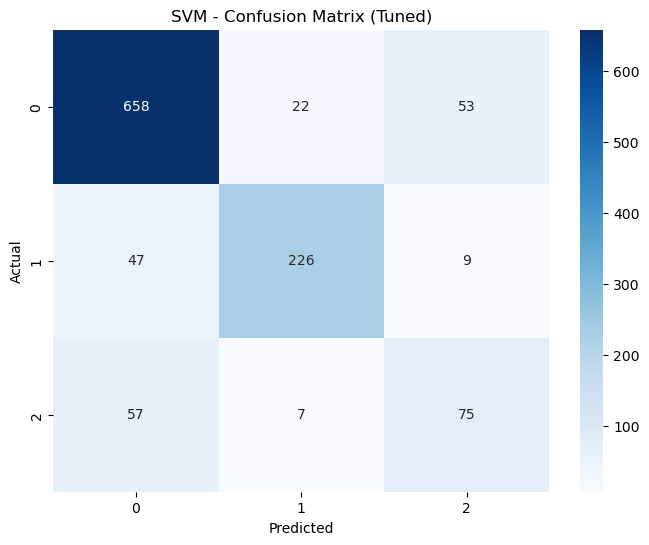

In [147]:
# Predict on the test set using the best model
y_test_pred_svm_best = best_svm.predict(X_test)
# Predict on the training set
y_train_pred_svm_best = best_svm.predict(X_train)


# Evaluate the model's accuracy
train_accuracy_svm_best = accuracy_score(y_train, y_train_pred_svm_best)
test_accuracy_svm_best = accuracy_score(y_test, y_test_pred_svm_best)
print(f"SVM Train Accuracy after tuning: {train_accuracy_svm_best}")
print(f"SVM Test Accuracy after tuning: {test_accuracy_svm_best}")

# Classification report for the tuned SVM model
best_svm_report = classification_report(y_test, y_test_pred_svm_best, output_dict=True)
print("Classification Report on Test Set (Tuned SVM):")
print(classification_report(y_test, y_test_pred_svm_best))

# Plot the confusion matrix
conf_matrix_svm_best = confusion_matrix(y_test, y_test_pred_svm_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix (Tuned)')
plt.show()


## RF

Random Forest Train Accuracy: 1.0
Test Accuracy SVM: 0.8154246100519931
Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.84      0.90      0.87       733
           2       0.82      0.73      0.77       282
           3       0.65      0.56      0.60       139

    accuracy                           0.82      1154
   macro avg       0.77      0.73      0.75      1154
weighted avg       0.81      0.82      0.81      1154



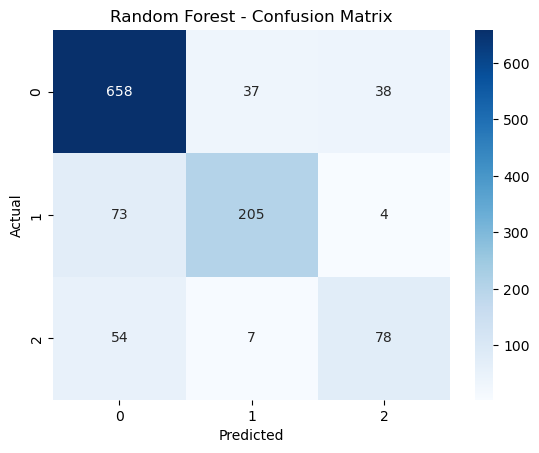

In [148]:
# Instantiate and train the Random Forest classifier on the SMOTE-balanced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy on the test set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Train Accuracy: {train_accuracy_rf}")
print(f"Test Accuracy SVM: {test_accuracy_rf}")

# Evaluate the Random Forest model
print("Random Forest - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf))

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the Random Forest model

In [127]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}


In [128]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1,scoring=hispanic_recall_scorer)

# Fit GridSearchCV to the SMOTE-balanced training data
grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  24.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(class_3_recall), verbose=2)

In [129]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_rf.best_params_}")

# Best model based on the grid search
best_rf = grid_search_rf.best_estimator_


Best Hyperparameters from GridSearchCV: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Best RF Training Accuracy: 1.0
Best RF Test Accuracy after tuning: 0.8240901213171578
Classification Report on Test Set (Tuned Random Forest):
              precision    recall  f1-score   support

           1       0.84      0.91      0.88       733
           2       0.85      0.73      0.78       282
           3       0.66      0.55      0.60       139

    accuracy                           0.82      1154
   macro avg       0.78      0.73      0.75      1154
weighted avg       0.82      0.82      0.82      1154



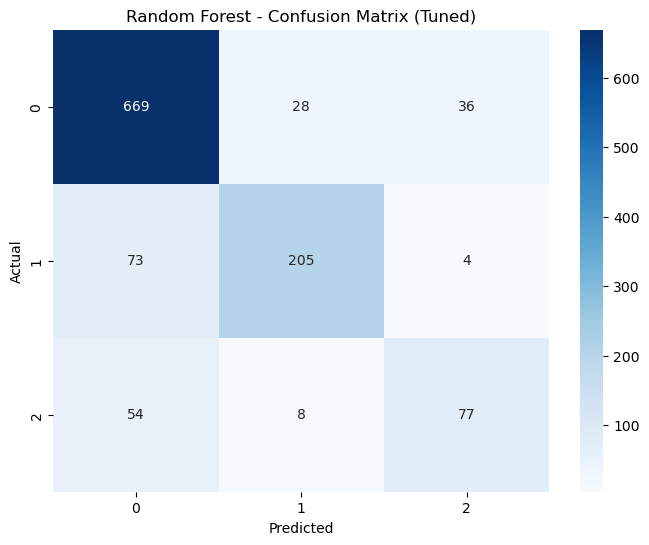

In [149]:
# Predict on the test set using the best model
y_train_pred_rf_best = best_rf.predict(X_train)
y_test_pred_rf_best = best_rf.predict(X_test)

# Evaluate the model's accuracy
test_accuracy_rf_best = accuracy_score(y_test, y_test_pred_rf_best)
train_accuracy_rf_best = accuracy_score(y_train, y_train_pred_rf_best)

print(f"Best RF Training Accuracy: {train_accuracy_rf_best}")
print(f"Best RF Test Accuracy after tuning: {test_accuracy_rf_best}")


# Classification report for the tuned Random Forest model
best_rf_report = classification_report(y_test, y_test_pred_rf_best, output_dict=True)
print("Classification Report on Test Set (Tuned Random Forest):")
print(classification_report(y_test, y_test_pred_rf_best))

# Plot the confusion matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_test_pred_rf_best)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix (Tuned)')
plt.show()


## XGBoost

In [131]:
# XGBoost expects the class labels to start from 0, whereas our labels are [1, 2, 3]. 
# XGBoost requires the class labels to be consecutive integers starting from 0 (i.e., [0, 1, 2]).
# We can subtract 1 from each class label to transform our labels from [1, 2, 3] to [0, 1, 2]

y_train_smote_adjusted = y_train_smote - 1
y_test_adjusted = y_test - 1


Train Accuracy XGBoost: 1.0
Test Accuracy XGBoost: 0.8743500866551126
XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.90      0.93      0.91       733
           2       0.89      0.88      0.88       282
           3       0.69      0.58      0.63       139

    accuracy                           0.87      1154
   macro avg       0.83      0.80      0.81      1154
weighted avg       0.87      0.87      0.87      1154



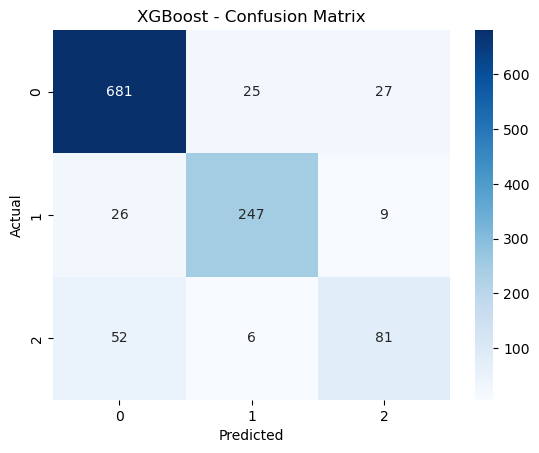

In [150]:
# Instantiate and train the XGBoost classifier on the SMOTE-balanced data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote_adjusted)

# Make predictions on the test set (using the adjusted labels)
y_test_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)

# Since we adjusted the labels for training, convert predictions back to original labels
y_test_pred_xgb_adjusted = y_test_pred_xgb + 1
y_train_pred_xgb_adjusted = y_train_pred_xgb + 1

# Evaluate accuracy on the test set
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb_adjusted)
print(f"Train Accuracy XGBoost: {train_accuracy_xgb}")
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb_adjusted)
print(f"Test Accuracy XGBoost: {test_accuracy_xgb}")

# Evaluate the XGBoost model
print("XGBoost - Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_xgb_adjusted))

# Plot confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb_adjusted)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()


### Let's apply GridSearchCV and hyperparameter tuning for the XGBoost model

In [140]:
# Create a custom scorer to maximize recall for Class 3 (Hispanic) for XGBoost
# As we subtracted 1 from class labels we need to adjust the class_3_recall function
def class_3_recall_xgb(y_true, y_pred):
    # Filter y_true and y_pred for only Class 3 instances
    y_true_class_3 = (y_true == 2)
    y_pred_class_3 = (y_pred == 2)
    
    # Calculate recall for Class 3
    return recall_score(y_true_class_3, y_pred_class_3)

# Create a scorer object using make_scorer
hispanic_recall_scorer_xgb = make_scorer(class_3_recall_xgb)

In [141]:
# Define the hyperparameter grid for tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [3, 6, 9],                  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],       # Learning rate (eta)
    'subsample': [0.8, 1.0],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],          # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5],                       # Minimum loss reduction required for a split
}


In [143]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2, 
    n_jobs=-1,
    scoring=hispanic_recall_scorer_xgb)

# Fit GridSearchCV to the SMOTE-balanced training data (with adjusted labels)
grid_search_xgb.fit(X_train_smote, y_train_smote_adjusted)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(class_3_recall_xgb), verbose=2)

In [144]:
# Get the best parameters and model
print(f"Best Hyperparameters from GridSearchCV: {grid_search_xgb.best_params_}")

Best Hyperparameters from GridSearchCV: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


In [156]:
# Best model based on the grid search
best_xgb = XGBClassifier(
    colsample_bytree=0.8, 
    gamma=0,               
    learning_rate=0.3,       
    max_depth=6,            
    n_estimators=300,      
    subsample=0.8,          
    use_label_encoder=False, 
    eval_metric='mlogloss',  
    random_state=42          #
)

# Fit the model using the SMOTE-balanced training data
best_xgb.fit(X_train_smote, y_train_smote_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Best XGB Train Accuracy: 1.0
Best XGB Test Accuracy: 0.878682842287695
Classification Report on Test Set (Tuned XGBoost):
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       733
           2       0.90      0.87      0.88       282
           3       0.72      0.58      0.64       139

    accuracy                           0.88      1154
   macro avg       0.84      0.80      0.81      1154
weighted avg       0.87      0.88      0.88      1154



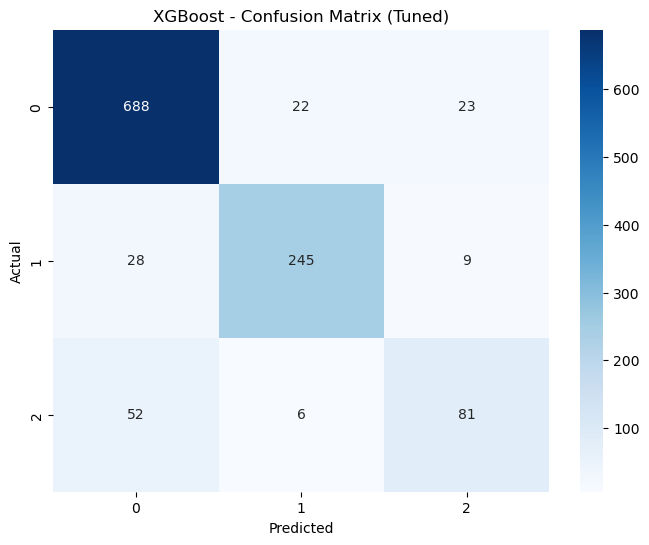

In [157]:
# Predict on the test set (with adjusted labels)
y_test_pred_xgb_best = best_xgb.predict(X_test)
y_train_pred_xgb_best = best_xgb.predict(X_train)

# Convert predictions back to original labels (add 1)
y_test_pred_xgb_best_adjusted = y_test_pred_xgb_best + 1
y_train_pred_xgb_best_adjusted = y_train_pred_xgb_best + 1

# Evaluate the model's accuracy
train_accuracy_xgb_best = accuracy_score(y_train, y_train_pred_xgb_best_adjusted)
test_accuracy_xgb_best = accuracy_score(y_test, y_test_pred_xgb_best_adjusted)
print(f"Best XGB Train Accuracy: {train_accuracy_xgb_best}")
print(f"Best XGB Test Accuracy: {test_accuracy_xgb_best}")

# Evaluate the model's performance with original labels
best_xgb_report = classification_report(y_test, y_test_pred_xgb_best_adjusted, output_dict=True)
print("Classification Report on Test Set (Tuned XGBoost):")
print(classification_report(y_test, y_test_pred_xgb_best_adjusted))

# Plot the confusion matrix
conf_matrix_xgb_best = confusion_matrix(y_test, y_test_pred_xgb_best_adjusted)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_xgb_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix (Tuned)')
plt.show()


## Comparing Models

In [158]:
# Create a DataFrame to store accuracy, precision, recall, and F1-score for each model
metrics_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [test_accuracy_smote, test_accuracy_rf_best, test_accuracy_svm_best, test_accuracy_xgb_best],
    'Precision (weighted avg)': [
        best_log_report['weighted avg']['precision'], 
        best_rf_report['weighted avg']['precision'], 
        best_svm_report['weighted avg']['precision'], 
        best_xgb_report['weighted avg']['precision']
    ],
    'Recall (weighted avg)': [
        best_log_report['weighted avg']['recall'], 
        best_rf_report['weighted avg']['recall'], 
        best_svm_report['weighted avg']['recall'], 
        best_xgb_report['weighted avg']['recall']
    ],
    'F1-Score (weighted avg)': [
        best_log_report['weighted avg']['f1-score'], 
        best_rf_report['weighted avg']['f1-score'], 
        best_svm_report['weighted avg']['f1-score'], 
        best_xgb_report['weighted avg']['f1-score']
    ],
        'Class 3 Recall': [
        best_log_report['3']['recall'], 
        best_rf_report['3']['recall'], 
        best_svm_report['3']['recall'], 
        best_xgb_report['3']['recall']
    ],
        'Class 3 Precision': [
        best_log_report['3']['precision'], 
        best_rf_report['3']['precision'], 
        best_svm_report['3']['precision'], 
        best_xgb_report['3']['precision']
    ],
})

# Display the metrics comparison table
print(metrics_summary)


                 Model  Accuracy  Precision (weighted avg)  \
0  Logistic Regression  0.786828                  0.840756   
1        Random Forest  0.824090                  0.820975   
2                  SVM  0.831023                  0.831007   
3              XGBoost  0.878683                  0.874662   

   Recall (weighted avg)  F1-Score (weighted avg)  Class 3 Recall  \
0               0.786828                 0.798223        0.769784   
1               0.824090                 0.819864        0.553957   
2               0.831023                 0.830280        0.539568   
3               0.878683                 0.875466        0.582734   

   Class 3 Precision  
0           0.451477  
1           0.658120  
2           0.547445  
3           0.716814  


## Analysis of Model Performance Based on Accuracy, Weighted Metrics, and Class 3 (Hispanic) Recall and Precision

The table below summarizes the performance of four models—**Logistic Regression**, **Random Forest**, **SVM**, and **XGBoost**—across several key metrics: **accuracy**, **precision**, **recall**, **F1-score**, and the specific performance for **Class 3 (Hispanic)** in terms of **recall** and **precision**.

---

### **1. Logistic Regression**
- **Accuracy**: 78.68%
- **Precision (Weighted Avg)**: 0.8408
- **Recall (Weighted Avg)**: 0.7868
- **F1-Score (Weighted Avg)**: 0.7982
- **Class 3 Recall**: 0.7698
- **Class 3 Precision**: 0.4515

#### Observations:
- The **recall for Class 3** is relatively high at **0.77**, meaning the model correctly identifies 77% of the actual Hispanic instances.
- However, the **precision for Class 3** is low (**0.45**), indicating that many non-Hispanic instances are being misclassified as Hispanic, leading to a high false-positive rate.
- The overall accuracy is on the lower side compared to other models, suggesting that while this model is sensitive to Class 3, it may not generalize as well across all classes.

---

### **2. Random Forest**
- **Accuracy**: 82.41%
- **Precision (Weighted Avg)**: 0.8210
- **Recall (Weighted Avg)**: 0.8241
- **F1-Score (Weighted Avg)**: 0.8199
- **Class 3 Recall**: 0.5540
- **Class 3 Precision**: 0.6581

#### Observations:
- **Accuracy** is higher than Logistic Regression, and both **precision and recall** are well-balanced for the overall model.
- For **Class 3**, the **recall drops to 0.55**, meaning the model identifies only 55% of the actual Hispanic instances, which is significantly lower than Logistic Regression.
- However, **precision for Class 3** is much better at **0.66**, indicating fewer false positives compared to Logistic Regression, though it sacrifices some sensitivity in doing so.

---

### **3. SVM**
- **Accuracy**: 83.10%
- **Precision (Weighted Avg)**: 0.8310
- **Recall (Weighted Avg)**: 0.8310
- **F1-Score (Weighted Avg)**: 0.8303
- **Class 3 Recall**: 0.5396
- **Class 3 Precision**: 0.5474

#### Observations:
- **Overall accuracy** and weighted metrics (precision, recall, F1-score) are slightly higher than Logistic Regression and Random Forest.
- However, the **performance for Class 3** is relatively poor. **Recall for Class 3** is **0.54**, and **precision** is **0.55**, indicating that the model struggles to both correctly identify Hispanic instances and avoid false positives.

---

### **4. XGBoost**
- **Accuracy**: 87.87%
- **Precision (Weighted Avg)**: 0.8747
- **Recall (Weighted Avg)**: 0.8787
- **F1-Score (Weighted Avg)**: 0.8755
- **Class 3 Recall**: 0.5827
- **Class 3 Precision**: 0.7168

#### Observations:
- **XGBoost** outperforms the other models in **accuracy** and all weighted metrics (precision, recall, F1-score), making it the best general model.
- **Class 3 Recall** is **0.58**, which is higher than both Random Forest and SVM but lower than Logistic Regression.
- **Class 3 Precision** is the highest at **0.71**, meaning XGBoost makes the fewest false positives for Class 3 among all models, though it sacrifices some sensitivity (recall) compared to Logistic Regression.

---

### **Key Takeaways**
1. **Logistic Regression** has the highest **recall** for **Class 3** but suffers from low **precision**, meaning it misclassifies many non-Hispanic instances as Hispanic.
   
2. **Random Forest** and **XGBoost** both have much better **precision** for Class 3, with XGBoost outperforming in both **precision** and **overall accuracy**. However, both models sacrifice some **recall** for Class 3 compared to Logistic Regression.

3. **SVM** performs well overall but underperforms in terms of **Class 3** recall and precision, making it less suitable for targeting the minority class effectively.

4. **XGBoost** is the most balanced model, showing strong overall performance while maintaining a good balance between **Class 3 recall and precision**, making it the best choice for your use case if both **accuracy** and **Class 3 precision** are priorities.

---

### **Next Steps**
- If the goal is to maximize **recall for Class 3 (Hispanic)**, **Logistic Regression** might still be preferable, though it would require further tuning to improve precision.
- If you need to balance overall accuracy with **Class 3 precision**, **XGBoost** is likely the best choice based on these results.




### <b>We will select XGBoost model as our best model for deployment!</b>

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [159]:
# Let's inititalize our final XGB model based the parameters defined from the grid search
final_xgb = XGBClassifier(
    colsample_bytree=0.8, 
    gamma=0,               
    learning_rate=0.3,       
    max_depth=6,            
    n_estimators=300,      
    subsample=0.8,          
    use_label_encoder=False, 
    eval_metric='mlogloss',  
    random_state=42          #
)

# XGBoost expects the class labels to start from 0, whereas our labels are [1, 2, 3]. 
# We can subtract 1 from each class label to transform our labels from [1, 2, 3] to [0, 1, 2]
y_adjusted = y-1

# Fit the final model using the whole dataset
final_xgb.fit(X_pca, y_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [160]:
with open('final_xgboost_model.pkl', 'wb') as f:
    pickle.dump(final_xgb, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the column names to a file (using pickle)
with open('encoded_columns.pkl', 'wb') as f:
    pickle.dump(columns_after_encoding, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


Key Points to Remember:

* SMOTE should be applied only to the training data, not the whole dataset (including test data), as SMOTE generates synthetic data that may lead to unrealistic evaluation if applied to the test set.
* Scaling must be applied before PCA and SMOTE, as both PCA and SMOTE depend on the scaled feature space.
* During inference (e.g., on the test set or new data), you apply only the scaling and PCA transformations (without SMOTE).

### Inference (Predicting on New Data):
For new data or the test set, we would only apply the scaling and PCA steps (without SMOTE), then use the trained model to make predictions.

In [3]:
# Load the model, scaler, and PCA
with open('final_xgboost_model.pkl', 'rb') as f:
    final_xgb = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

with open('encoded_columns.pkl', 'rb') as f:
    columns_after_encoding = pickle.load(f)
    
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)
    

In [8]:
# Preprocess the new data. Columns to be dropped based on original preprocessing
columns_to_drop = ['subjectid', 'Ethnicity', 'SubjectNumericRace', 'Heightin', 'Weightlbs', 'WritingPreference', 'Date', 'Installation', 'Component', 'PrimaryMOS']

# Function to drop columns with exception handling
def preprocess_data(df):
    try:
        # Attempt to drop specified columns
        df = df.drop(columns=columns_to_drop, axis=1)
    except KeyError as e:
        # Handle the case where some columns are missing
        missing_columns = list(set(columns_to_drop) - set(df.columns))
        print(f"Warning: Missing columns in the new data: {missing_columns}")
    df = df[df.DODRace<=3]
    return df

# Step 1: Preprocess the data (e.g., X_new)
df_raw = pd.read_csv('df_raw_for_new_data.csv')
new_df = df_raw.sample(10)
new_df = preprocess_data(new_df)
X_new = new_df.drop(columns='DODRace')

# Step 2: Encode the data
# Apply Label Encoding to Gender column
X_new['Gender'] = label_encoder.transform(X_new['Gender'])

# Apply One-Hot Encoding to the new data (test set)
X_new_encoded = pd.get_dummies(X_new, columns=['Branch', 'SubjectsBirthLocation'], drop_first=True)

# Reindex the encoded test data to ensure it has the same columns as the training data
X_new_encoded = X_new_encoded.reindex(columns=columns_after_encoding, fill_value=0)

# Step 3: Scale the new data
X_new_scaled = scaler.transform(X_new_encoded)  # This uses the scaler saved from the training phase

# Step 4: Apply PCA to the scaled test data
X_new_pca = pca.transform(X_new_scaled)  # Apply PCA on the scaled data, not the raw data

# Step 5: Make predictions
predictions = final_xgb.predict(X_new_pca)

# Since we adjusted the labels for training, convert predictions back to original labels
predictions = predictions + 1

# Output the predictions
print(predictions)


[3 2 3 1 1 2 2 1 1 1]


In [9]:
# Basic Comparison of Actual vs Predicted Values
y_test_new = new_df['DODRace']
# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test_new,       # Actual values
    'Predicted': predictions  # Predicted values
})

results_df

,Actual,Predicted
758,3,3
4992,2,2
4083,3,3
3927,1,1
4472,1,1
3641,2,2
4720,2,2
5197,1,1
4968,1,1
1093,1,1


#  SHAP

**SHAP (SHapley Additive exPlanations)**

**What is it?**

SHAP is a tool used to explain the predictions of machine learning models. SHAP values measure the impact of each feature on a prediction. These values are based on Shapley values, a mathematical theory from cooperative game theory.

**Purpose:**
- **Model Interpretability**: Understanding which features most influence predictions.
- **Feature Selection**: Identifying the most important features to reduce model complexity.
- **Audit and Compliance**: Explaining model decisions and meeting regulatory requirements.
- **Model Improvement**: Understanding where the model performs well or poorly.

**Applications:**
- **Credit Scoring**: Understanding which factors affect an individual's credit score.
- **Healthcare**: Identifying which medical features are important for predicting diseases.
- **Marketing**: Understanding factors that influence customer behavior.
- **Natural Language Processing**: Understanding which words or features are important in tasks like text classification or sentiment analysis.

**Importance in Unbalanced Data Sets:**

In unbalanced datasets, the model can be biased toward the majority class. SHAP is useful in such cases because it helps identify why the model might be misclassifying the minority class and provides insights into how different features affect the model's predictions for both majority and minority classes. https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

- SHAP shows how much each feature contributes to predictions on a per-observation basis or across the entire dataset, indicating the impact of each feature when predicting classes.

- For instance, if we select features specifically related to the Hispanic class and perform feature selection only on those features, our scores might improve even with fewer observations.

- This approach is different from the feature importance analysis we did previously.

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Thanks - Hoping it will be useful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about our latest updates, please don't forget to follow us!</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |